In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

TASK-A

In [2]:
import numpy as np
from scipy.integrate import trapezoid

def fourier_series_coeff(signal, time, order, period=None):
    """
    Calculate Fourier series coefficients using exponential form.

    Parameters
    ----------
    signal : numpy array (N,)
        Sampled values of the signal over one period
    time : numpy array (N,)
        Time samples (uniformly spaced across one cycle)
    order : int
        Number of harmonics to compute on each side (will return from -order to +order)
    period : float, optional
        Fundamental period. If not given, inferred from time vector

    Returns
    -------
    coeffs : numpy array (2*order+1,)
        Fourier coefficients from -order to +order
    harmonics : numpy array (2*order+1,)
        Harmonic indices corresponding to the coefficients
    """
    if period is None:
        period = time[-1] - time[0]

    num_samples = len(time)
    delta_t = time[1] - time[0]

    harmonics = np.arange(-order, order + 1)
    coeffs = np.zeros(len(harmonics), dtype=complex)

    for idx, n in enumerate(harmonics):
        term = signal * np.exp(-1j * 2 * np.pi * n * time / period)
        coeffs[idx] = (1.0 / period) * trapezoid(term, time)

    return coeffs, harmonics


task A- a

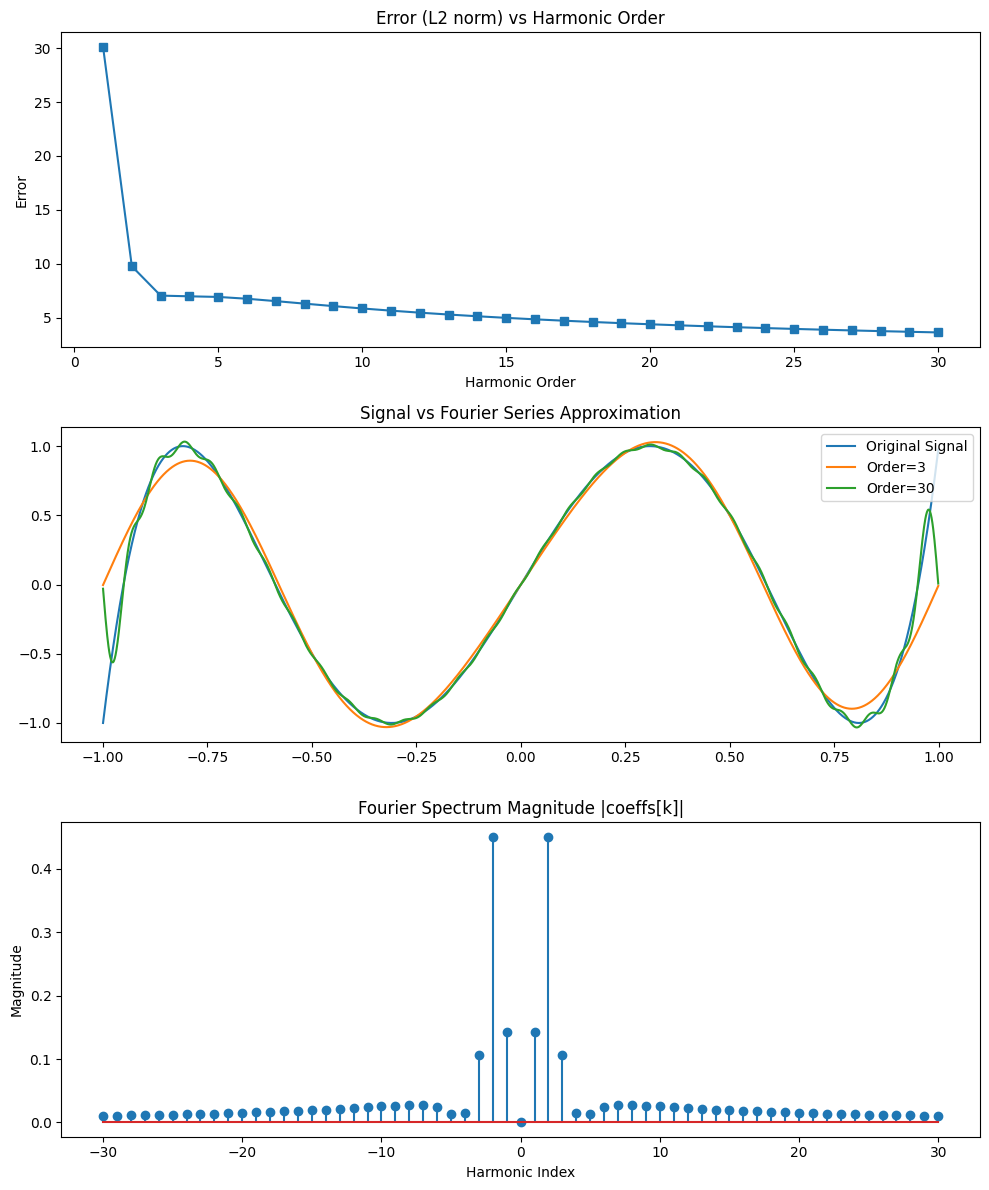

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define polynomial T5
def poly_T5(u):
    return 16*u**5 - 20*u**3 + 5*u

step = 0.001
time_axis = np.arange(-1, 1, step)
signal_vals = poly_T5(time_axis)
fund_period = 2

max_order = 30
coeffs, harmonics = fourier_series_coeff(signal_vals, time_axis, max_order, period=fund_period)

# Reconstruct signal from Fourier series
def fs_reconstruct(tt, coeffs, harmonics, period):
    approx = np.zeros_like(tt, dtype=complex)
    for a, h in zip(coeffs, harmonics):
        approx += a * np.exp(1j * 2 * np.pi * h * tt / period)
    return approx.real

# Compute approximation errors for different orders
err_list = []
order_list = range(1, max_order + 1)
for n in order_list:
    sub_coeffs, sub_harm = fourier_series_coeff(signal_vals, time_axis, n, period=fund_period)
    approx_sig = fs_reconstruct(time_axis, sub_coeffs, sub_harm, fund_period)
    diff = np.linalg.norm(signal_vals - approx_sig)
    err_list.append(diff)

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# (i) Error vs Order
axes[0].plot(order_list, err_list, marker='s')
axes[0].set_title("Error (L2 norm) vs Harmonic Order")
axes[0].set_xlabel("Harmonic Order")
axes[0].set_ylabel("Error")

# (ii) Original vs Approximations
approx_small = fs_reconstruct(time_axis, *fourier_series_coeff(signal_vals, time_axis, 3, period=fund_period), fund_period)
approx_large = fs_reconstruct(time_axis, *fourier_series_coeff(signal_vals, time_axis, 30, period=fund_period), fund_period)
axes[1].plot(time_axis, signal_vals, label="Original Signal")
axes[1].plot(time_axis, approx_small, label="Order=3")
axes[1].plot(time_axis, approx_large, label="Order=30")
axes[1].legend()
axes[1].set_title("Signal vs Fourier Series Approximation")

# (iii) Spectrum magnitude
axes[2].stem(harmonics, np.abs(coeffs))
axes[2].set_title("Fourier Spectrum Magnitude |coeffs[k]|")
axes[2].set_xlabel("Harmonic Index")
axes[2].set_ylabel("Magnitude")

plt.tight_layout()
plt.show()


task A - b

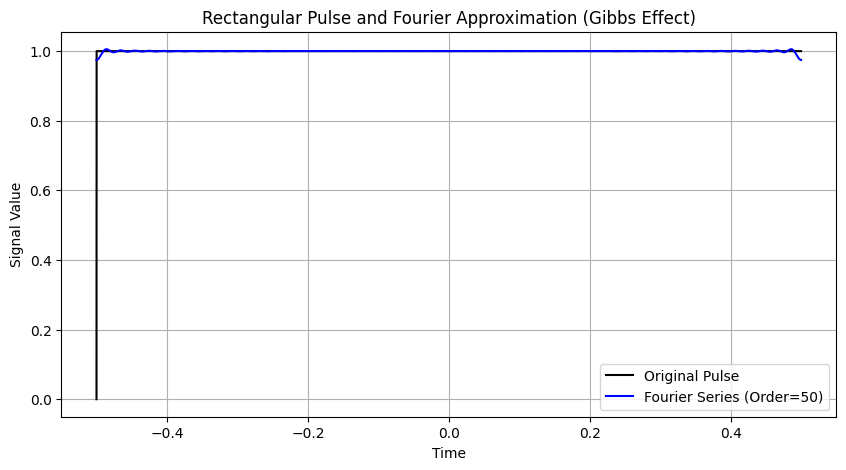

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

# Parameters
period = 1.0        # fundamental period
width = 1.0         # pulse width
num_terms = 50      # number of Fourier harmonics

# Time samples
num_points = 6000
time = np.linspace(-period/2, period/2, num_points, endpoint=False)

# Rectangular pulse definition
pulse = np.where(np.abs(time) < width/2, 1.0, 0.0)

# Compute Fourier coefficients
harmonics = np.arange(-num_terms, num_terms + 1)
coeffs = np.zeros(len(harmonics), dtype=complex)

for idx, h in enumerate(harmonics):
    integrand = pulse * np.exp(-1j * 2 * np.pi * h * time / period)
    coeffs[idx] = (1.0 / period) * trapezoid(integrand, time)

# Reconstruct with Fourier approximation
recon = np.zeros_like(time, dtype=complex)
for coeff, h in zip(coeffs, harmonics):
    recon += coeff * np.exp(1j * 2 * np.pi * h * time / period)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, pulse, 'k', label="Original Pulse")
plt.plot(time, recon.real, 'b', label=f"Fourier Series (Order={num_terms})")
plt.title("Rectangular Pulse and Fourier Approximation (Gibbs Effect)")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()
plt.grid(True)
plt.show()


1. Why does the Fourier approximation overshoot near discontinuities?
When a discontinuous signal like a rectangular pulse is expressed using Fourier series, we are combining smooth sine and cosine waves to mimic sharp jumps. Since these basis functions are continuous, they cannot instantly jump at the discontinuity. Instead, they oscillate around the edges, which leads to overshoots and undershoots near the sharp transitions.

2. Why does this effect not vanish as K → ∞?
Increasing the number of Fourier terms makes the oscillations narrower and more localized around the discontinuity. However, the Fourier series at a discontinuity always converges to the midpoint of the left and right limits, not to the actual jump. The overshoot does not disappear but approaches a fixed proportion of the step size (approximately 9%). As K grows, the region of oscillation shrinks, but the magnitude of overshoot remains.

task A - c

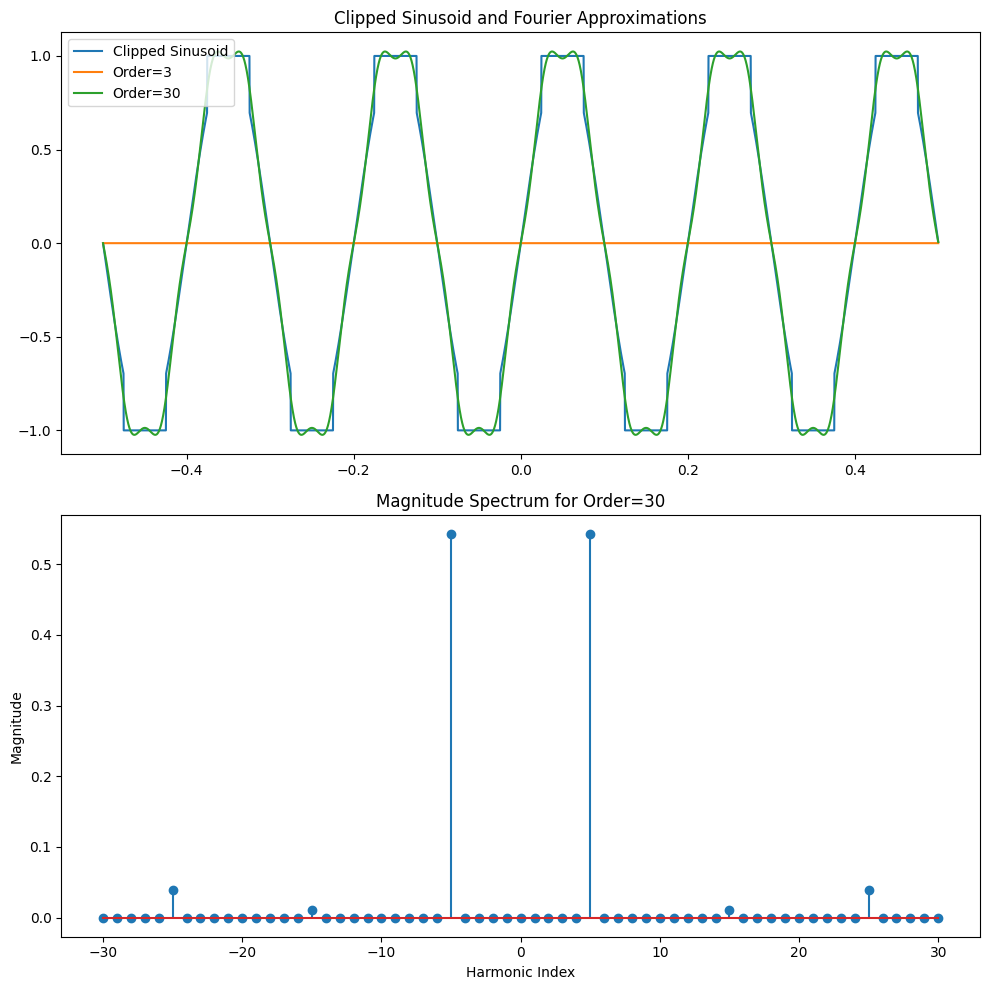

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
freq = 5           # base frequency
period = 1.0       # signal period
samples = 4000     # number of time points

# Time vector
time = np.linspace(-period/2, period/2, samples, endpoint=False)

# Original sinusoid
sine_wave = np.sin(2 * np.pi * freq * time)

# Apply clipping to form a nonlinear signal
clipped = np.where(sine_wave > 0.7, 1.0,
                   np.where(sine_wave < -0.7, -1.0, sine_wave))

# Compute Fourier coefficients for two different truncation orders
coeffs_3, harm_3 = fourier_series_coeff(clipped, time, 3, period)
coeffs_30, harm_30 = fourier_series_coeff(clipped, time, 30, period)

# Reconstruct approximations
approx_3 = fs_reconstruct(time, coeffs_3, harm_3, period)
approx_30 = fs_reconstruct(time, coeffs_30, harm_30, period)

# Plot results
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# (i) Original vs Approximations
axes[0].plot(time, clipped, label="Clipped Sinusoid")
axes[0].plot(time, approx_3, label="Order=3")
axes[0].plot(time, approx_30, label="Order=30")
axes[0].legend()
axes[0].set_title("Clipped Sinusoid and Fourier Approximations")

# (ii) Spectrum
axes[1].stem(harm_30, np.abs(coeffs_30))
axes[1].set_title("Magnitude Spectrum for Order=30")
axes[1].set_xlabel("Harmonic Index")
axes[1].set_ylabel("Magnitude")

plt.tight_layout()
plt.show()
